# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

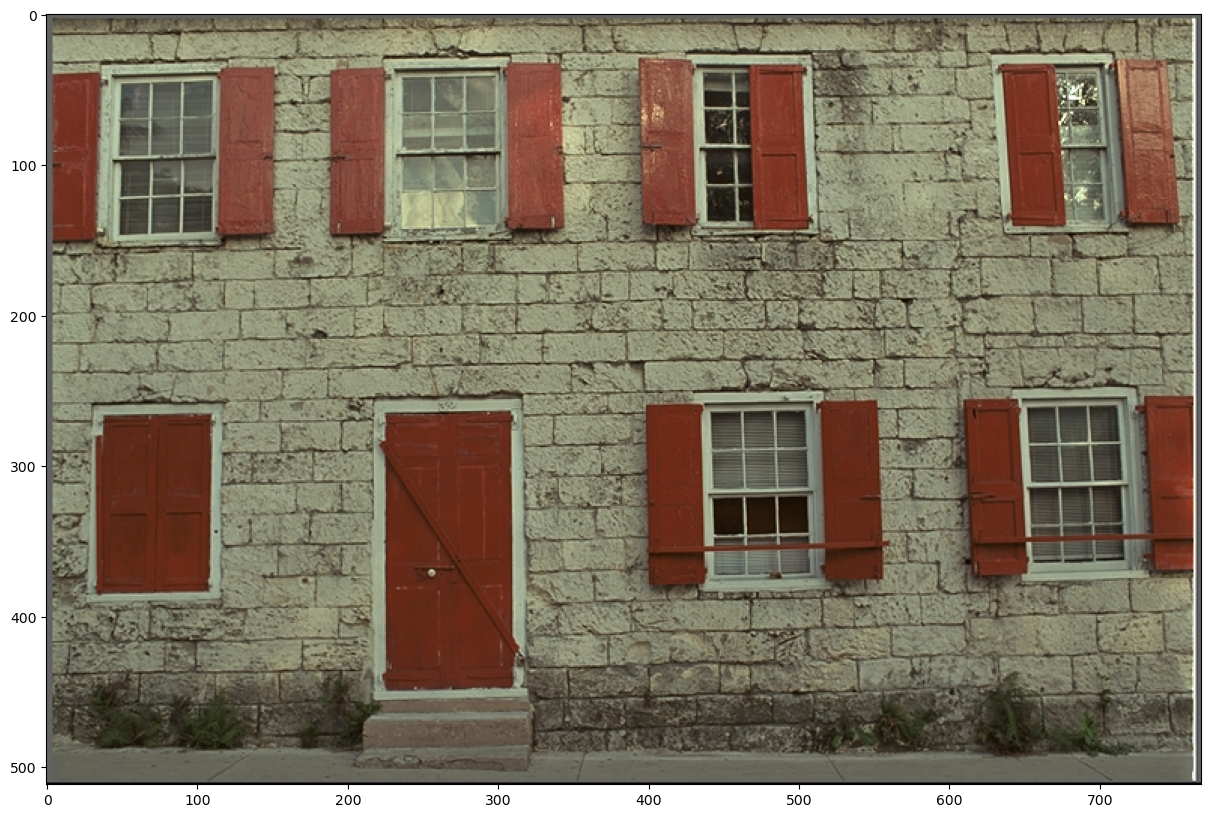

In [65]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

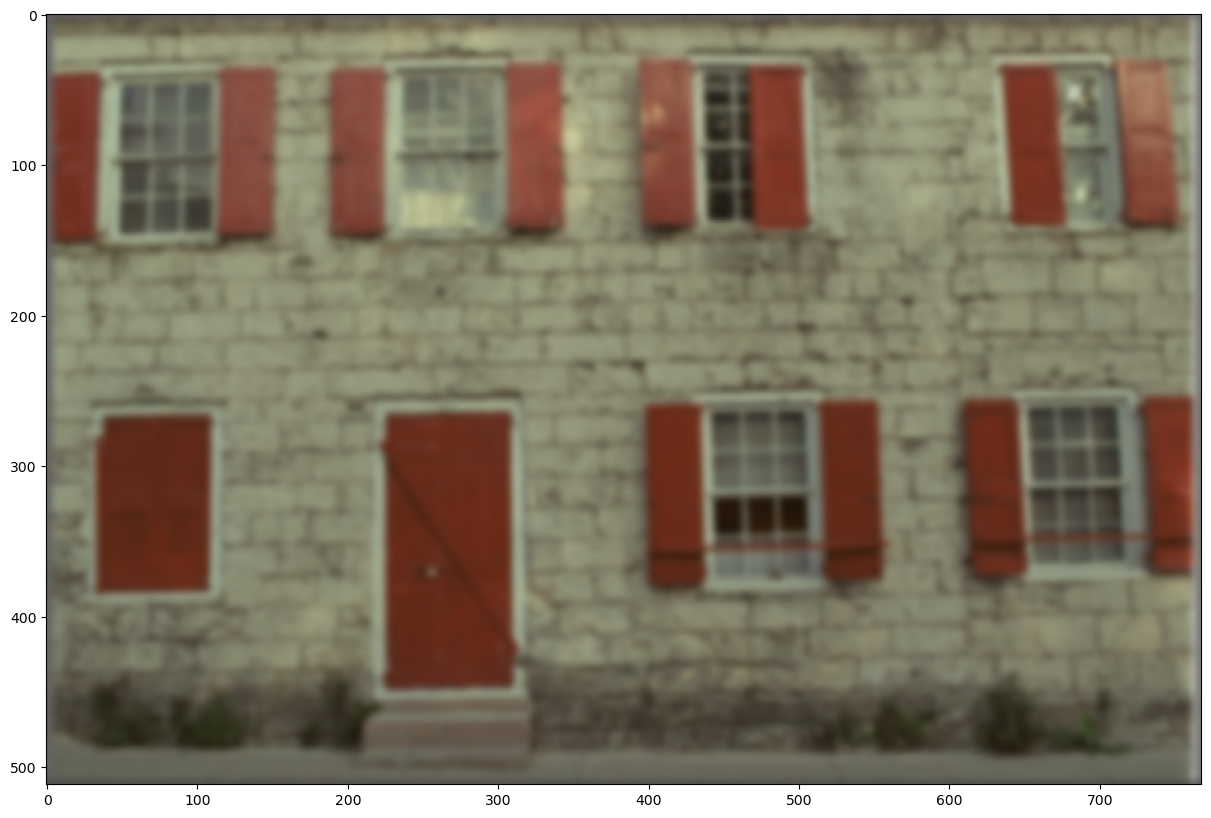

In [67]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (15, 15), 0)
plt.imshow(unsharp)

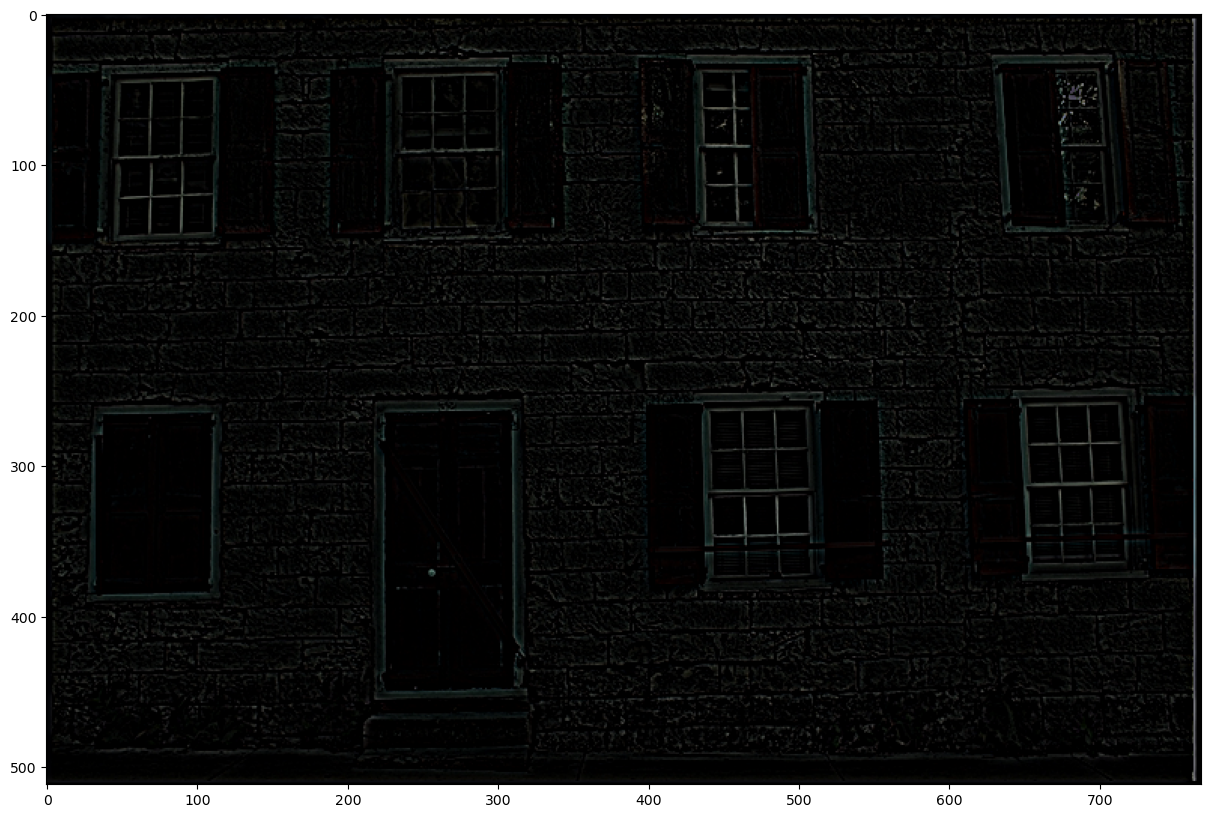

In [69]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)
diff = img_float - unsharp_float
diff = np.clip(diff, 0, 255).astype(np.uint8) 

plt.imshow(diff)

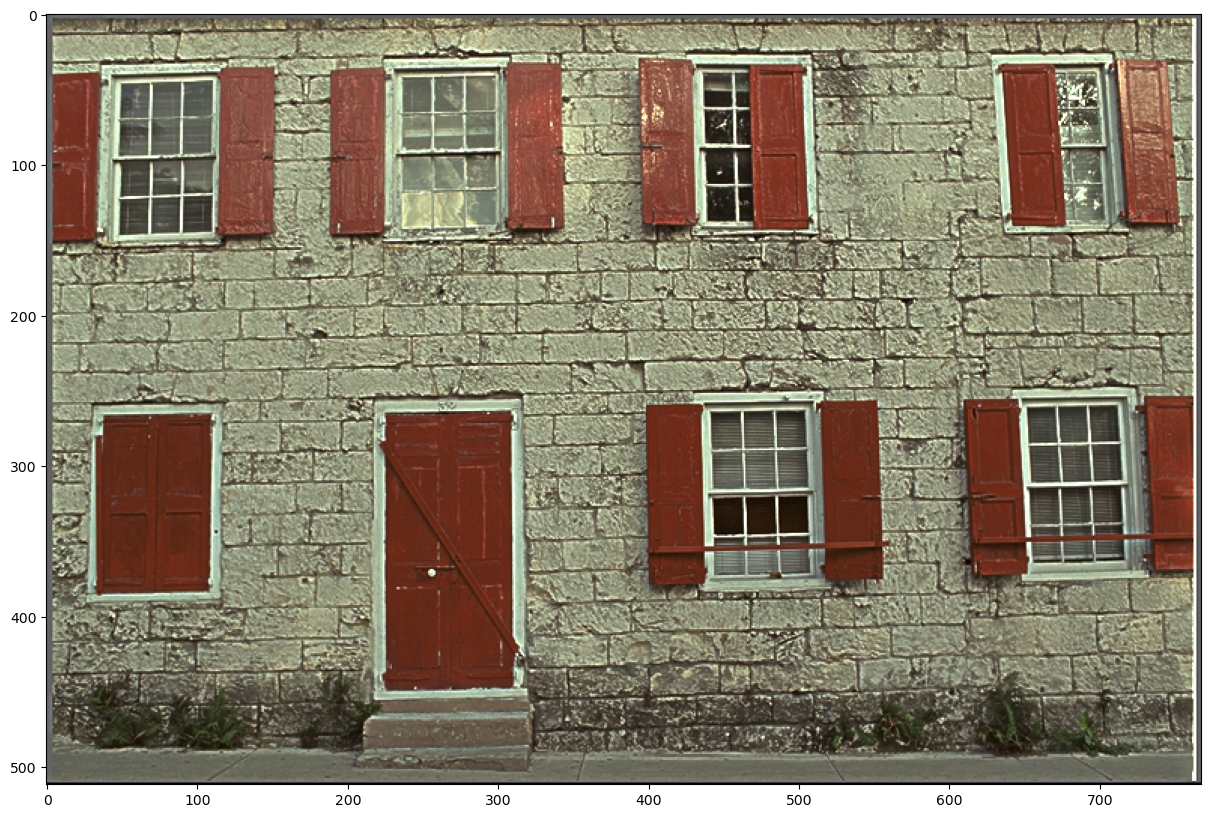

In [71]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 1.5
sharpened = img_float + (diff * amount)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
A good value for the amount is 1.0-0.2. Such an amount enhances details without causing artifacts.


* What happens if it is too small?
If the amount is too small (less than 1.0), the sharpening effect will be weak or unnoticeable(the image may still appear slightly blurry)
   
* What happens if it is too large?
If the amount is too large, the sharpening becomes extreme. This can introduce bright edges around objects and noise increase